# *Classificação e Classificadores de dados*

### A Classificação de dados é uma técnica comum e muito importante para *Machine Learning* esta técnica tem como objetivo atribuir categorias e/ou rótulos para os dados em questão e a mesma auxilia na exploração dos mesmos.

### SGD(Stochastic Gradient Descent) ou Método do Gradiente Estocástico trata-se de um método iterativo que objetiva suavizar os resultados finais de dada função de maneira otimizada. No próximo bloco é possível notar um exemplo de código que referencia este método.

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Crie um conjunto de dados fictício de vendas de carros
np.random.seed(0)
n_samples = 500
X = np.random.rand(n_samples, 3)  # Três características fictícias (por exemplo, preço, quilometragem, idade do veículo)
y = np.random.choice([0, 1], n_samples)  # Classe fictícia (0 para não vendido, 1 para vendido)

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronize as características (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie um classificador usando SGD com uma regressão logística
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Treine o classificador no conjunto de treinamento
classifier.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = classifier.predict(X_test)

# Avalie o desempenho do classificador
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do classificador: {:.2f}%".format(accuracy * 100))


Acurácia do classificador: 54.00%


### No modelo acima foi possível notar a acurácia do classificador, porém existem outros métodos para dissecar melhor nosso problema e afinar os resultados. A técnica de Validação cruzada ou Cross-validation está intrinsecamente ligada a avalicação do desempenho de modelos de machine learning e também para estimar se os mesmos se comportam bem quando se há dados não vistos, isto com os modelos treinados.

### Esta técnica pode ser unida a outra técnica deixando os resultados mais claros, como por exemplo a Matriz de Confusão ou Tabela de Contingência. Ela permite visualizar o desempenho de um modelo em uma comparação de suas previsões com as classes reais dos dados. Abaixo temos um exemplo do nosso código de venda de automóveis com estas duas técnicas aplicadas.

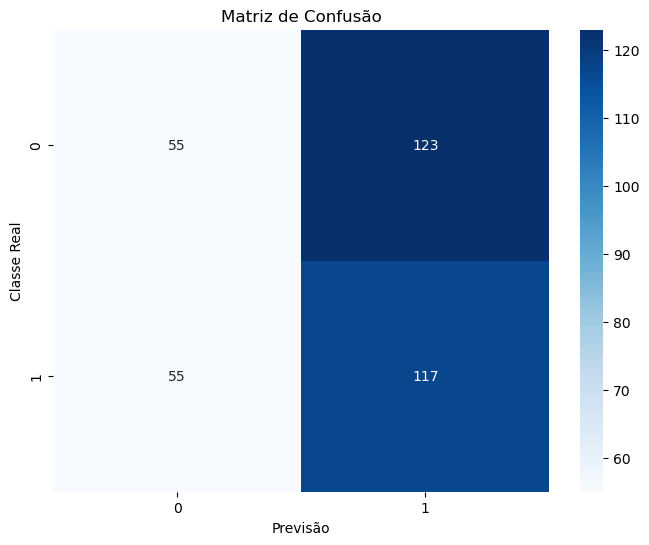

Acurácia média da validação cruzada: 49.14%


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um conjunto de dados fictício de vendas de carros
np.random.seed(0)
n_samples = 500
X = np.random.rand(n_samples, 3)  # Três características fictícias (por exemplo, preço, quilometragem, idade do veículo)
y = np.random.choice([0, 1], n_samples)  # Classe fictícia (0 para não vendido, 1 para vendido)

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronize as características (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie um classificador usando SGD com uma regressão logística
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Realize a validação cruzada (exemplo com 5 folds)
y_pred_cv = cross_val_predict(classifier, X_train, y_train, cv=5)

# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_pred_cv)

# Exiba a matriz de confusão usando um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Classe Real')
plt.title("Matriz de Confusão")
plt.show()

# Avalie o desempenho do classificador com acurácia
accuracy = accuracy_score(y_train, y_pred_cv)
print("Acurácia média da validação cruzada: {:.2f}%".format(accuracy * 100))


### Ao realizar previsões em um modelo de classificação, é essencial compreender os seguintes conceitos:

### Limiar de Decisão: O limiar que determina como o modelo classifica as previsões com base na pontuação de probabilidade gerada. Um valor de 0,5 é comumente usado, mas pode ser ajustado para equilibrar precisão e revocação.

### Precisão e Revocação (ou Recall):

#### Precisão: A proporção de previsões corretas em relação ao total de previsões positivas. Mede a confiabilidade das previsões positivas.
#### Revocação: A proporção de previsões corretas em relação ao total de exemplos positivos. Avalia a capacidade do modelo de identificar todos os exemplos positivos.

### Curva ROC (Receiver Operating Characteristic): Uma representação gráfica do desempenho do modelo em diferentes limiares de decisão. Mostra a taxa de verdadeiros positivos em função da taxa de falsos positivos. Uma curva ROC próxima ao canto superior esquerdo indica bom desempenho. A área sob a curva (AUC-ROC) resuma o desempenho global do modelo.

## Abaixo temos a continuação do nosso código com as técnicas explicitadas implementadas

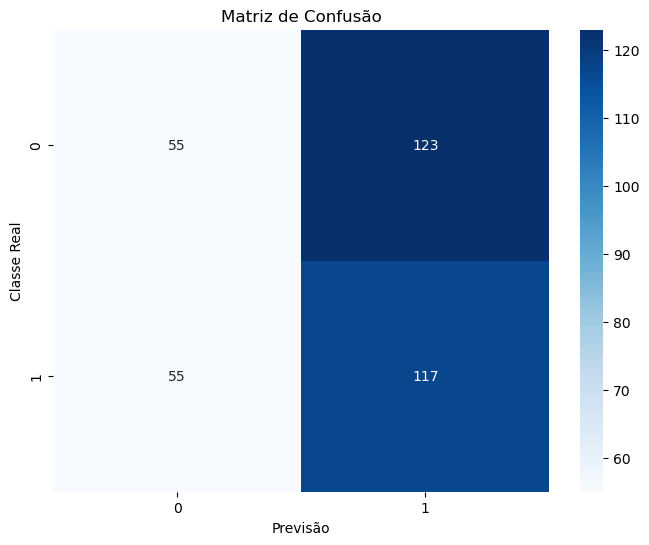

Acurácia média da validação cruzada: 49.14%
Precisão: 0.49
Revocação: 0.68


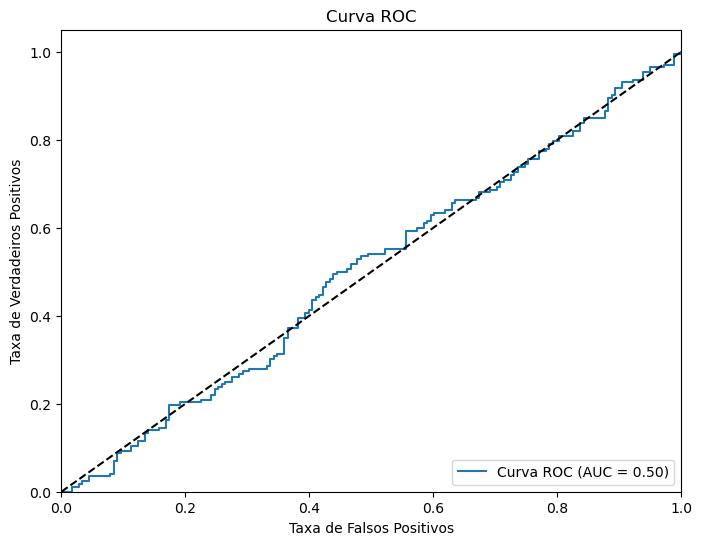

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um conjunto de dados fictício de vendas de carros
np.random.seed(0)
n_samples = 500
X = np.random.rand(n_samples, 3)  # Três características fictícias (por exemplo, preço, quilometragem, idade do veículo)
y = np.random.choice([0, 1], n_samples)  # Classe fictícia (0 para não vendido, 1 para vendido)

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronize as características (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie um classificador usando SGD com uma regressão logística
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Realize a validação cruzada (exemplo com 5 folds)
y_scores = cross_val_predict(classifier, X_train, y_train, cv=5, method='decision_function')

# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_train, (y_scores > 0).astype(int))

# Exiba a matriz de confusão usando um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Classe Real')
plt.title("Matriz de Confusão")
plt.show()

# Avalie o desempenho do classificador com acurácia
accuracy = accuracy_score(y_train, (y_scores > 0).astype(int))
print("Acurácia média da validação cruzada: {:.2f}%".format(accuracy * 100))

# Calcule precisão e revocação em um limiar de decisão específico (por exemplo, 0)
threshold = 0
y_pred = (y_scores > threshold).astype(int)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print(f'Precisão: {precision:.2f}')
print(f'Revocação: {recall:.2f}')

# Calcule a curva ROC e o AUC-ROC
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = roc_auc_score(y_train, y_scores)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


### A classificação multilabel e a classificação multioutput são dois tipos de tarefas em aprendizado de máquina que envolvem a previsão de múltiplas saídas ou etiquetas.

### Classificação Multilabel:

#### -> Prever várias etiquetas para cada exemplo de entrada.
#### -> Etiquetas não são mutuamente exclusivas; um exemplo pode ter múltiplas etiquetas.
#### -> Exemplo: Classificar tags em uma postagem de blog, onde uma postagem pode ter várias tags.

### Multioutput:

#### -> Prever várias saídas independentes para cada exemplo de entrada.
#### -> Cada saída é uma classe separada e não está relacionada a outras saídas.
#### -> Exemplo: Prever a cor predominante e a textura de uma imagem em processamento de imagem.

### Diferença-chave: A classificação multilabel lida com etiquetas não mutuamente exclusivas, enquanto a classificação multioutput lida com saídas independentes e mutuamente exclusivas.

# Aplicação da Classificação Multilabel 

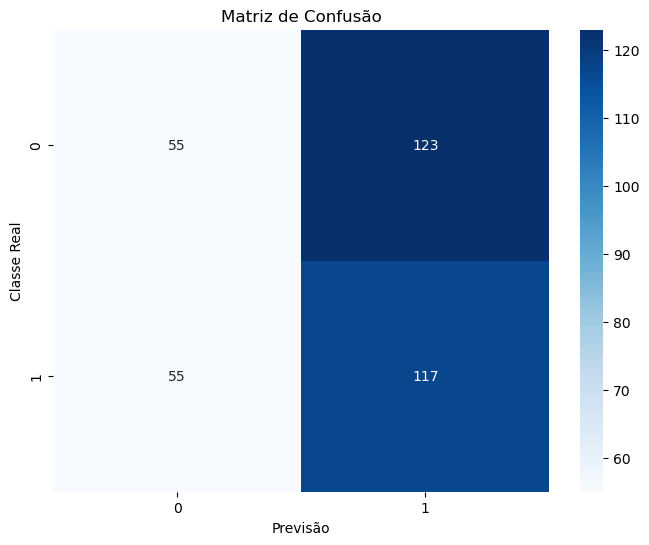

Acurácia média da validação cruzada: 49.14%
Precisão: 0.49
Revocação: 0.68


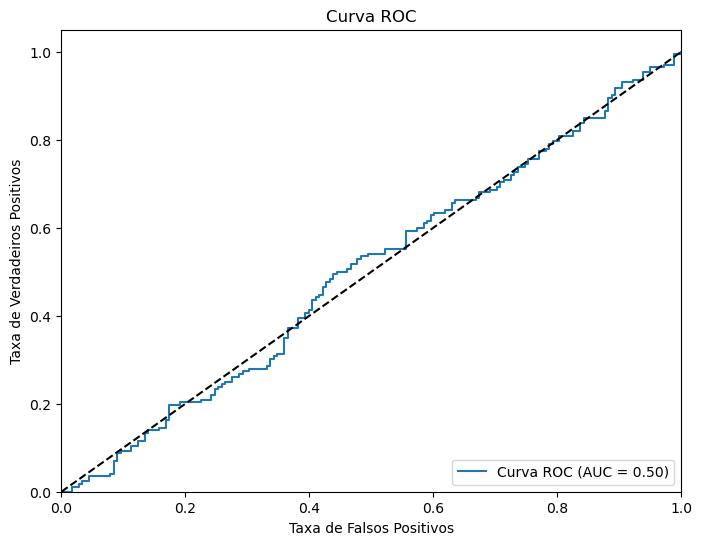

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um conjunto de dados fictício de vendas de carros
np.random.seed(0)
n_samples = 500
X = np.random.rand(n_samples, 3)  # Três características fictícias (por exemplo, preço, quilometragem, idade do veículo)
y = np.random.choice([0, 1], n_samples)  # Classe fictícia (0 para não vendido, 1 para vendido)

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronize as características (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie um classificador usando SGD com uma regressão logística
classifier = SGDClassifier(max_iter=1000, random_state=42)

# Realize a validação cruzada (exemplo com 5 folds)
y_scores = cross_val_predict(classifier, X_train, y_train, cv=5, method='decision_function')

# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_train, (y_scores > 0).astype(int))

# Exiba a matriz de confusão usando um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Classe Real')
plt.title("Matriz de Confusão")
plt.show()

# Avalie o desempenho do classificador com acurácia
accuracy = accuracy_score(y_train, (y_scores > 0).astype(int))
print("Acurácia média da validação cruzada: {:.2f}%".format(accuracy * 100))

# Calcule precisão e revocação em um limiar de decisão específico (por exemplo, 0)
threshold = 0
y_pred = (y_scores > threshold).astype(int)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print(f'Precisão: {precision:.2f}')
print(f'Revocação: {recall:.2f}')

# Calcule a curva ROC e o AUC-ROC
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
roc_auc = roc_auc_score(y_train, y_scores)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# Aplicação da Classificação Multioutput

Acurácia média da validação cruzada (output 1): 52.00%
Matriz de Confusão (output 2):
[[ 50 120]
 [ 74 106]]


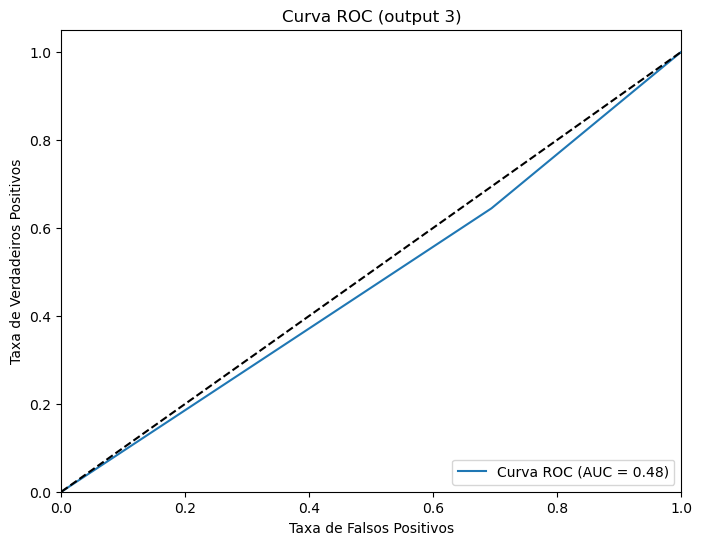

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Crie um conjunto de dados fictício de vendas de carros
np.random.seed(0)
n_samples = 500
X = np.random.rand(n_samples, 3)  # Três características fictícias (por exemplo, preço, quilometragem, idade do veículo)
y = np.random.choice([0, 1], size=(n_samples, 3))  # Três classes fictícias (0 ou 1) para cada exemplo

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronize as características (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crie um classificador usando SGD com uma regressão logística
classifier = MultiOutputClassifier(SGDClassifier(max_iter=1000, random_state=42))

# Realize a validação cruzada (exemplo com 5 folds)
y_scores = cross_val_predict(classifier, X_train, y_train, cv=5, method='predict')

# Aqui, y_scores é uma matriz de saída multioutput com saídas independentes.

# Em seguida, você pode calcular métricas para cada saída, como acurácia, matriz de confusão, etc.

# Exemplo de cálculo de acurácia para a primeira saída:
accuracy_output_1 = accuracy_score(y_train[:, 0], y_scores[:, 0])
print("Acurácia média da validação cruzada (output 1): {:.2f}%".format(accuracy_output_1 * 100))

# Exemplo de cálculo de matriz de confusão para a segunda saída:
conf_matrix_output_2 = confusion_matrix(y_train[:, 1], y_scores[:, 1])
print("Matriz de Confusão (output 2):")
print(conf_matrix_output_2)

# Calcule a curva ROC e o AUC-ROC para a terceira saída:
fpr_output_3, tpr_output_3, thresholds_output_3 = roc_curve(y_train[:, 2], y_scores[:, 2])
roc_auc_output_3 = roc_auc_score(y_train[:, 2], y_scores[:, 2])

# Plotar a curva ROC para a terceira saída
plt.figure(figsize=(8, 6))
plt.plot(fpr_output_3, tpr_output_3, label='Curva ROC (AUC = {:.2f})'.format(roc_auc_output_3))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC (output 3)')
plt.legend(loc='lower right')
plt.show()


# Em resumo Esses métodos desempenham um papel fundamental no treinamento, avaliação e otimização de modelos de aprendizado de máquina. São ferramentas essenciais para garantir que os modelos atendam aos requisitos específicos de diferentes problemas e conjuntos de dados, permitindo tomadas de decisão informadas quanto ao desempenho e ajustes necessários. Eles são cruciais para a validação e aprimoramento de modelos, contribuindo para o sucesso das aplicações de aprendizado de máquina.